Stopping search: Swarm best objective change less than 1e-08

--- Resultados Óptimos con PSO ---
Proporción de carga óptima: 30.000 %
Tiempo de curado óptimo:   60.000 min
Temperatura óptima:       100.000 °C
Resistencia máxima:       114.791 MPa


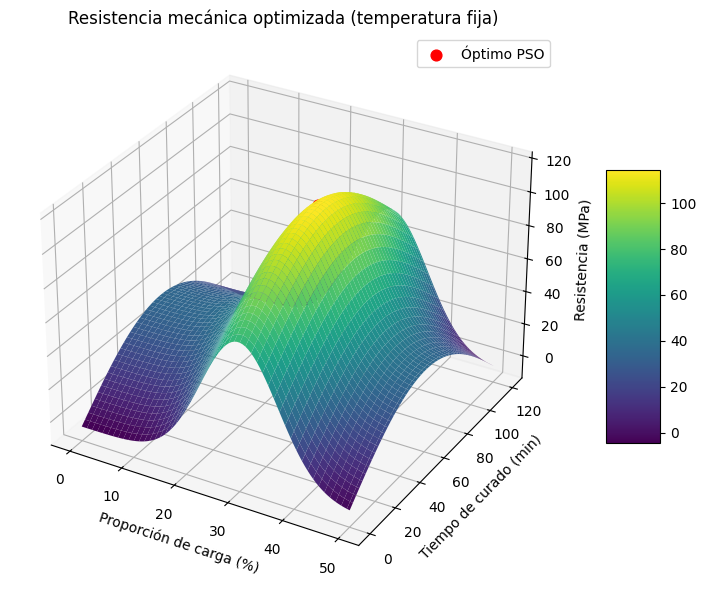

In [4]:
import numpy as np
from pyswarm import pso
import matplotlib.pyplot as plt

def resistencia(proporcion_carga, tiempo_curado, temperatura):
    return (
        80 * np.exp(-((proporcion_carga - 30) ** 2) / 100)
        + 40 * np.sin(np.pi * tiempo_curado / 120)
        + 30 * np.cos(np.pi * temperatura / 180)
    )

def objetivo(x):
    pc, tc, temp = x
    return -resistencia(pc, tc, temp)

limites_inferiores = [0.0, 0.0, 100.0]
limites_superiores = [50.0, 120.0, 200.0]

mejor_posicion, mejor_valor = pso(
    objetivo,
    limites_inferiores,
    limites_superiores,
    swarmsize=50,
    maxiter=100
)

resistencia_maxima = -mejor_valor

proporcion_opt, tiempo_opt, temp_opt = mejor_posicion
print("\n--- Resultados Óptimos con PSO ---")
print(f"Proporción de carga óptima: {proporcion_opt:.3f} %")
print(f"Tiempo de curado óptimo:   {tiempo_opt:.3f} min")
print(f"Temperatura óptima:       {temp_opt:.3f} °C")
print(f"Resistencia máxima:       {resistencia_maxima:.3f} MPa")

valores_pc = np.linspace(0.0, 50.0, 100)
valores_tc = np.linspace(0.0, 120.0, 100)
PC, TC = np.meshgrid(valores_pc, valores_tc)
Z = resistencia(PC, TC, temp_opt)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
superficie = ax.plot_surface(
    PC,
    TC,
    Z,
    cmap='viridis',
    edgecolor='none'
)
ax.scatter(proporcion_opt, tiempo_opt, resistencia_maxima, color='red', s=60, label='Óptimo PSO')
ax.set_title('Resistencia mecánica optimizada (temperatura fija)')
ax.set_xlabel('Proporción de carga (%)')
ax.set_ylabel('Tiempo de curado (min)')
ax.set_zlabel('Resistencia (MPa)')
ax.legend()
fig.colorbar(superficie, shrink=0.5, aspect=5)
plt.tight_layout()
plt.show()


In [2]:
!pip install pyswarm


  Preparing metadata (setup.py) ... done
  Created wheel for pyswarm: filename=pyswarm-0.6-py3-none-any.whl size=4463 sha256=6422ccd0b88195a63f258a936c9dafcb362e6548558da9522a5b9cbab5c719d8
  Stored in directory: /root/.cache/pip/wheels/bb/4f/ec/8970b83323e16aa95034da175454843947376614d6d5e9627f
Successfully built pyswarm
